In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
3,004 cases (7 day average) as of Tue 01 Jun, +232.1 since Mon 31 May
91 hospitalised (7 day average) as of Wed 02 Jun, +0.0 since Wed 02 Jun
6 died (7 day average) as of Tue 01 Jun, +0.0 since Mon 31 May


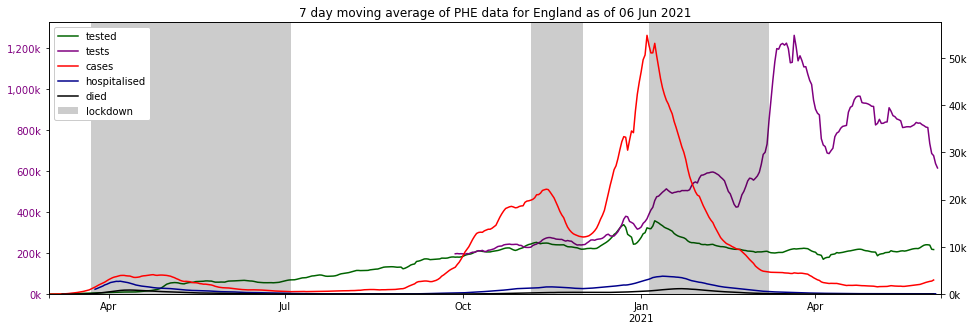

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

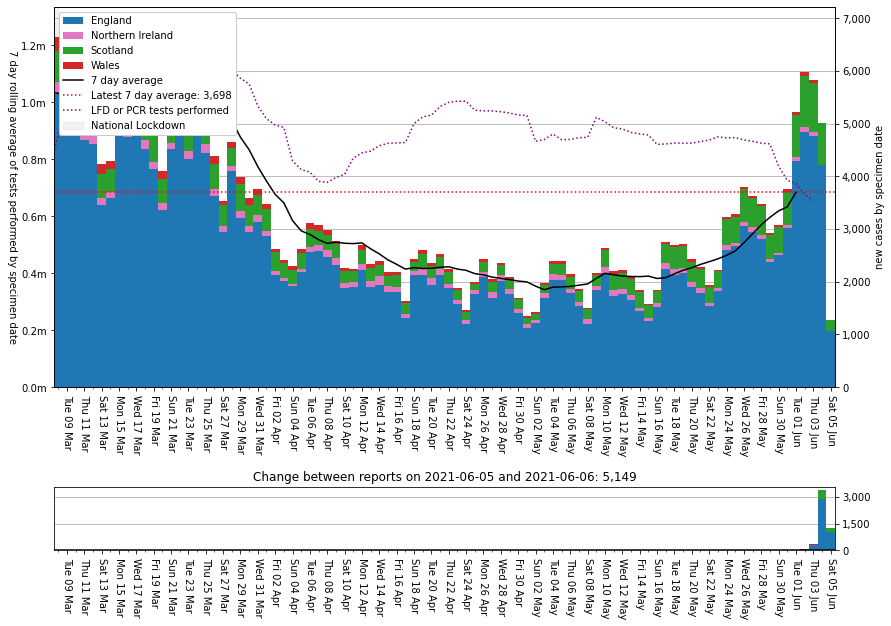

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

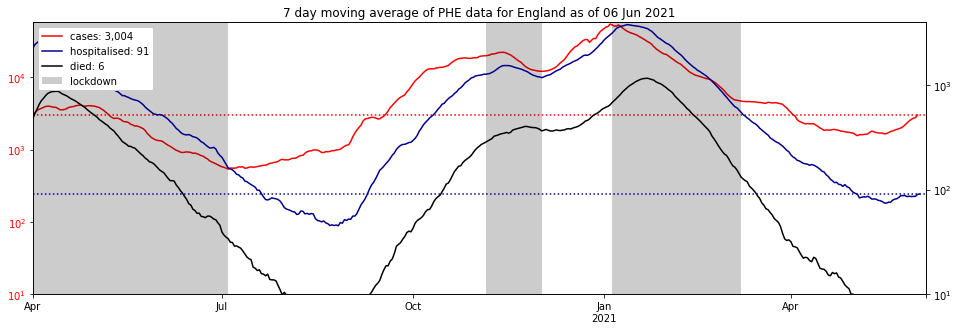

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

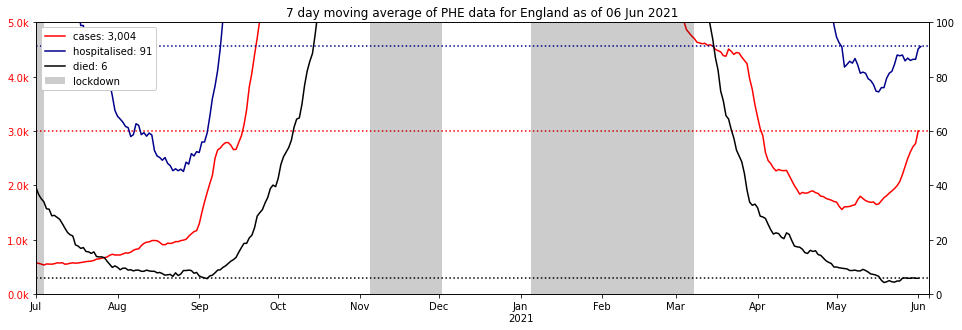

In [19]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=100)

In [7]:
vaccination_changes()

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,23493155.0,33700486.0,10207331.0,56286961,41.738183,18.134450,40.127366
1,Northern Ireland,N92000002,703582.0,1087136.0,383554.0,1893667,37.154473,20.254564,42.590962
2,Scotland,S92000003,2227493.0,3365779.0,1138286.0,5463300,40.771933,20.835136,38.392931
3,Wales,W92000004,1237123.0,2179830.0,942707.0,3152879,39.237884,29.899879,30.862237


'partial: 40,333,231 (60.4%), full: 27,661,353'

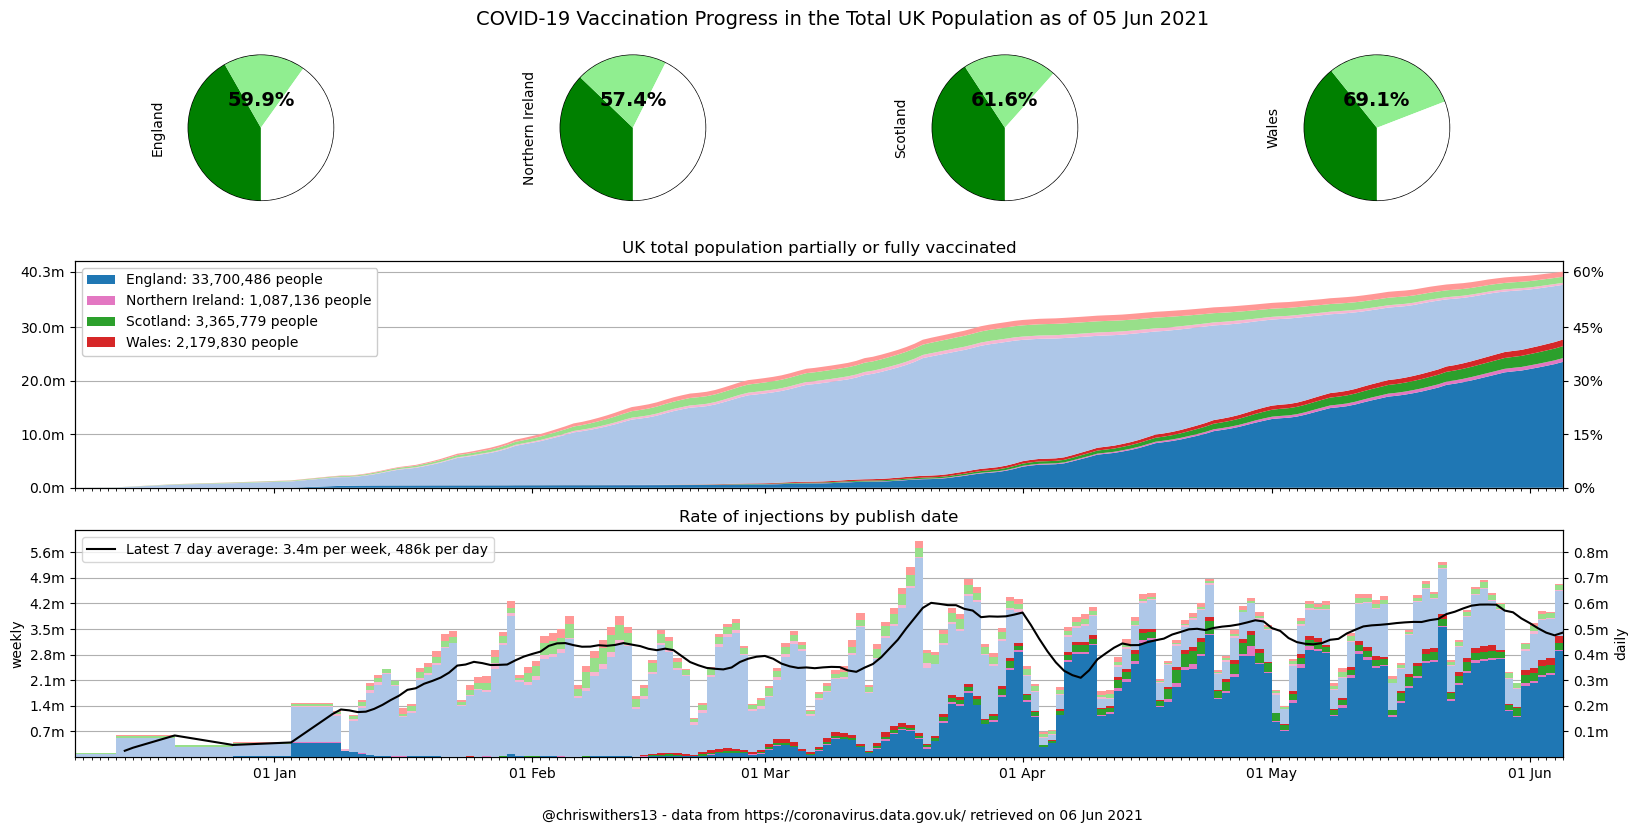

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

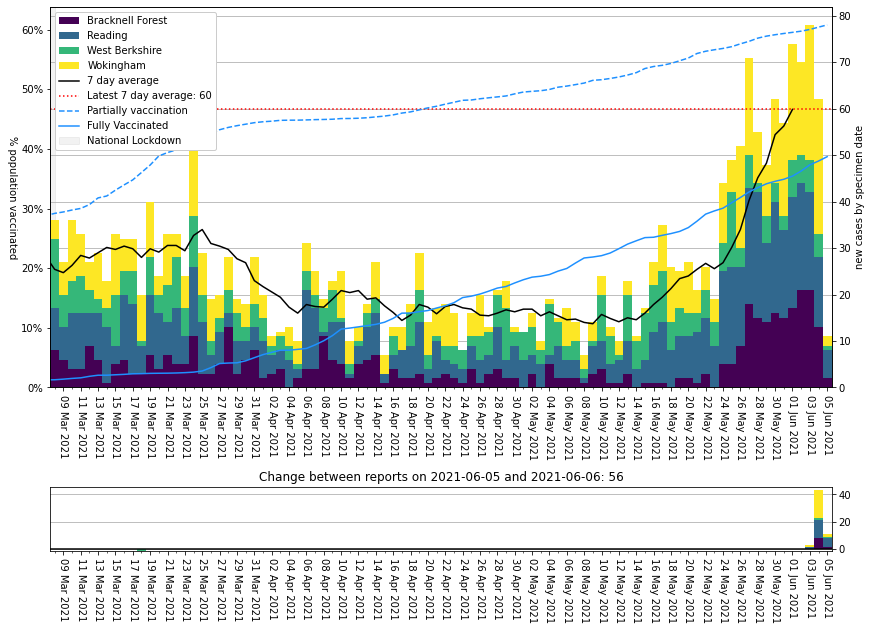

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1],  lines=population_vaccinated)

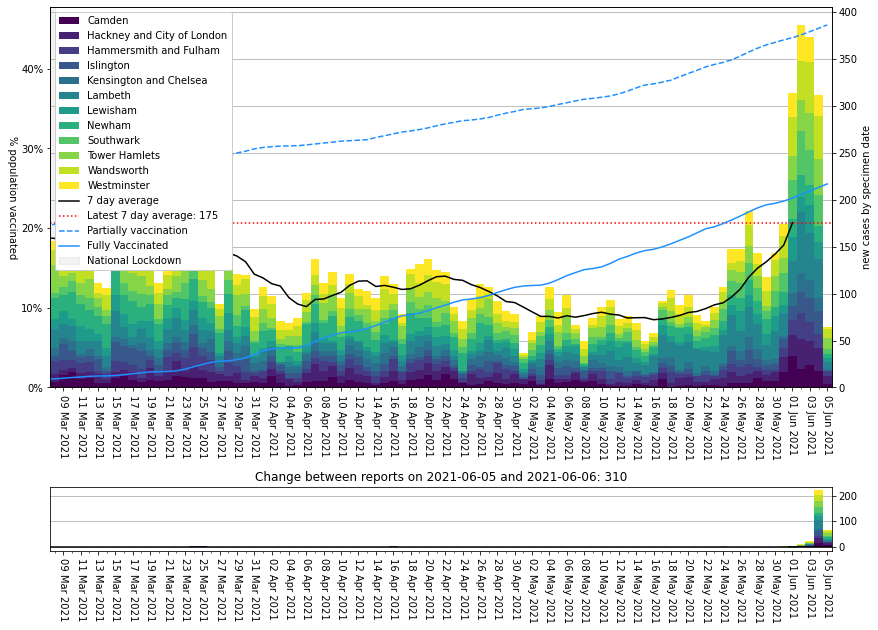

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000008,Blackburn with Darwen,512.371740,767.0,2021-06-05
E07000125,Rossendale,282.588624,202.0,2021-06-05
E08000001,Bolton,282.037906,811.0,2021-06-05
E07000126,South Ribble,251.832328,279.0,2021-06-05
E07000117,Burnley,248.538012,221.0,2021-06-05
E07000120,Hyndburn,246.782572,200.0,2021-06-05
E07000124,Ribble Valley,231.572724,141.0,2021-06-05
E08000006,Salford,213.650448,553.0,2021-06-05
E08000003,Manchester,200.594004,1109.0,2021-06-05


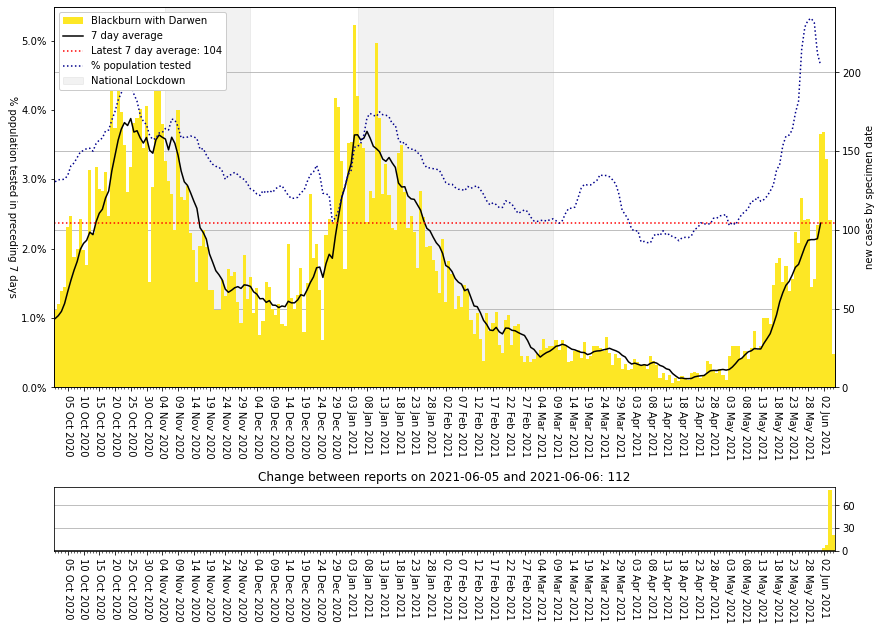

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000003,Manchester,200.594004,1109.0,2021-06-05
S12000049,Glasgow City,145.470053,921.0,2021-06-05
S12000036,City of Edinburgh,159.640333,838.0,2021-06-05
E08000001,Bolton,282.037906,811.0,2021-06-05
E06000008,Blackburn with Darwen,512.371740,767.0,2021-06-05
E08000025,Birmingham,56.051063,640.0,2021-06-05
E08000035,Leeds,71.614181,568.0,2021-06-05
E08000006,Salford,213.650448,553.0,2021-06-05
E08000007,Stockport,171.765676,504.0,2021-06-05


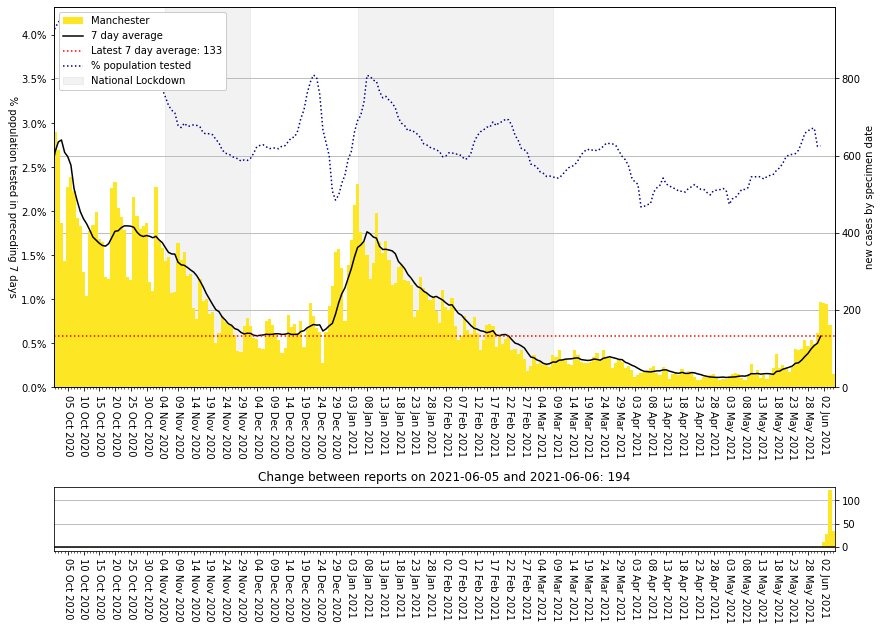

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.6
phe_max = 0.25

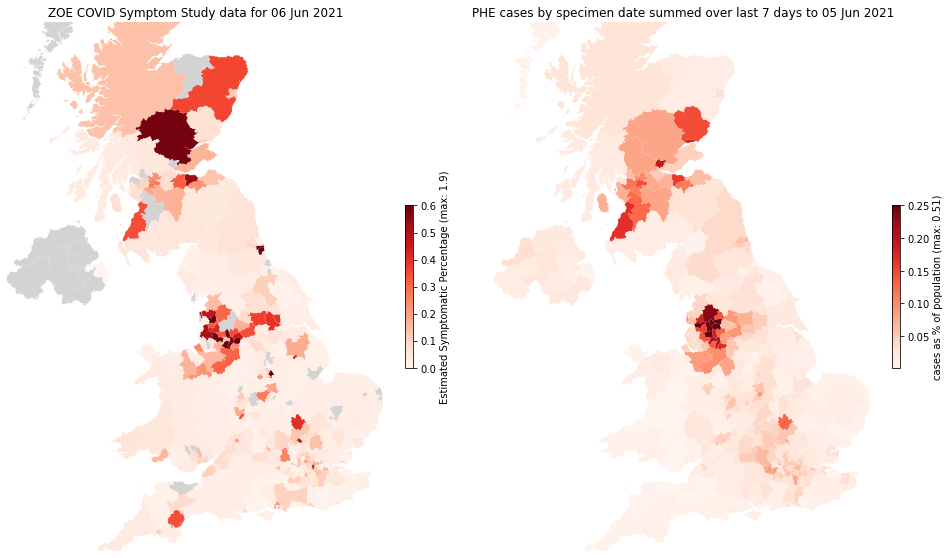

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...